In [2]:
#%matplotlib notebook use for 3D visulaization
#use for 2D visulaization
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from pandas.tools.plotting import parallel_coordinates

In [3]:
df = pd.read_csv('/home/sushant/test_tsne_speaker.csv', header = None, sep=",")

print(len(df.columns))

colnames = ['timestamp', 'faceID']
for i in range(0,len(df.columns)-2):
    colnames.append(i)
df.columns = colnames
# print(df.head())



Xdf = df.drop(['timestamp','faceID'], axis = 1)
# print(Xdf.head())


16


In [4]:
X = []
for i in range(0,len(Xdf.index)):
    X.append(np.array(Xdf.iloc[i]))
X = np.array(X)
Z = X
X = preprocessing.scale(X) #comment this if preprocessing after fitting

In [5]:
kmeans = KMeans(n_clusters=6, n_jobs = -1,max_iter=100 )
kmeans.fit(X)
y = kmeans.labels_
print(y)



[2 5 5 5 2 5 0 0 4 1 1 1 4 4 4 0 2 2 2 2 2 2 4 4 4 4 4 4 5 0 0 0 5 5 5 4 5
 3 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1]


In [6]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.04191088e+00  1.11500160e+00  7.49297846e-01  3.17891870e-01
  -4.87605669e-03 -5.34080064e-01 -1.45416246e+00 -2.10308929e-01
   1.34066978e+00 -8.04789336e-01  1.41988460e+00  7.71743096e-01
   1.23532552e+00  1.01164689e-01]
 [-9.54876078e-01 -1.20589642e+00 -8.57844616e-01 -7.63369638e-01
  -2.94533750e-01 -9.87009402e-02  6.12989980e-01  1.16682306e+00
  -1.79047090e-01  1.00622259e+00  1.65548718e-01  2.60829788e-01
  -4.37902757e-01  8.12403226e-01]
 [-7.41347054e-01 -2.02157460e-01 -1.12318622e+00 -5.29276399e-01
  -3.15901230e-02  1.28111276e+00  6.07708867e-04 -1.35779226e-01
  -1.12552550e+00  9.61938965e-01  3.44623830e-01 -1.12097185e+00
  -1.06329307e+00  2.35533694e-01]
 [ 1.45167148e-01  2.52908965e-01  2.17186209e-01 -8.72419385e-01
   1.49654677e+00 -8.65027816e-01  6.11872202e-01 -1.18996737e+00
   1.37583808e+00 -9.26270299e-01  8.64288082e-01  1.59779899e+00
   3.41644742e-01  4.72736066e-01]
 [ 1.34333164e+00  9.15130444e-01  1.06912596e+00  9.85579488e-01
  

In [7]:
# if preprocessing done after fitting, use this:
# X_lda = preprocessing.scale(X_lda)
# centroids_lda = preprocessing.scale(centroids_lda) 


In [8]:
#2-dimensional LDA
lda = LDA(n_components=2)
lda.fit(X,y)
X_2d = pd.DataFrame(lda.transform(X))
X_2d['labels']=y.tolist()
print(X_2d.head())
# y_cent = np.asarray(['0','1','2','3','4','5'],dtype= float64)
cent_2d =pd.DataFrame(lda.transform(centroids))
print(cent_2d.head())

          0         1  labels
0 -2.176069 -2.774319       2
1  3.138407 -1.064216       5
2  3.733987 -0.827922       5
3  2.813616  0.078910       5
4 -0.344239 -4.131164       2
          0         1
0 -1.129866  2.798174
1 -3.239525 -2.694979
2 -0.605518 -2.967297
3 -4.852513  4.426413
4  5.640834  1.641785


In [9]:
#Plotting and Visualization

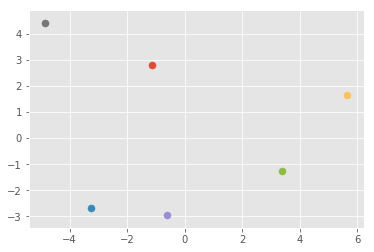

In [10]:
#Plotting the centroids
#1.For 3D plotting
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# for i in cent_2d.index:
#     ax.scatter(cent_2d.iloc[i][0],cent_2d_lda.iloc[i][1], cent_2d.iloc[i][2],s = 50)
# plt.show()
    
#2. for 2D plotting
for i in cent_2d.index:
    plt.scatter(cent_2d.iloc[i][0],cent_2d.iloc[i][1],s = 50)
    
plt.show()

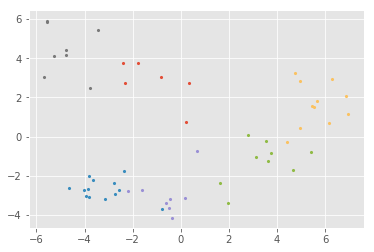

In [11]:
#Plotting the data point
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5',]

#1. For 3d Plotting
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection='3d')
# for label in set(y):
#     color = colors[label]
#     for i in range(0,len(X_2d.index)):
#         if (X_2d.iloc[i][2] == label):
#             ax1.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1],X_2d.iloc[i][2], marker="o", color=color, s=10, linewidths=5)
# plt.show()

for label in set(y):
    color = colors[label]
    for i in range(0,len(X_2d.index)):
        if (X_2d.iloc[i][2] == label):
            plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], marker=".", color=color, s=5, linewidths=2)
plt.show()

In [155]:
kmeans1 = KMeans(n_clusters=6, n_jobs = -1,max_iter=100 )
kmeans1.fit(Z)
z = kmeans1.labels_
print(z)

Zcentroids = kmeans1.cluster_centers_
# print(Zcentroids)

[0 0 0 0 0 0 0 0 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 5 3 5 3 5 5 3 3 5 3 5 3 5 5 3 5 3 3 5 3 5 3 5 3 5 5 3 3 5 3 5 3 5 5
 3 3 1 3 5 3 5 3 5 3 5 3 5 3 5 3 5 1 3 3 1 3 1 3 1 1 3 3 1 3 1 3 1 1 3 1 3
 3 1 3 1 3 1 3 1 3 1 3 1 4 1 4 1 1 4 4 1 4 1 4 1 4 1 4 1 2 1]


In [156]:
#if preprocessing done after fitting, use this:
Z = preprocessing.scale(Z)
Zcentroids = preprocessing.scale(Zcentroids) 
# print(Zcentroids)
# print(Z)

In [157]:
#2-dimensional LDA
lda = LDA(n_components=2)
lda.fit(Z,z) #Maximizes class separability using z
# print(u)
# print(z)
Z_2d = pd.DataFrame(lda.transform(Z))
Z_2d['labels']=z.tolist()
print(Z_2d.head())
Zcent_2d =pd.DataFrame(lda.transform(Zcentroids))
print(Zcent_2d.head())#if preprocessing done after fitting, use this:

           0         1  labels
0 -15.462167 -4.212749       0
1 -16.489137 -3.140638       0
2 -15.261710 -4.342877       0
3 -13.931519 -5.172417       0
4 -14.868852 -4.934913       0
            0            1
0  -32.592863  1491.481929
1 -467.111176 -1016.824865
2  229.771879     0.182213
3 -667.328732  -371.308592
4 -251.794245  1745.802389


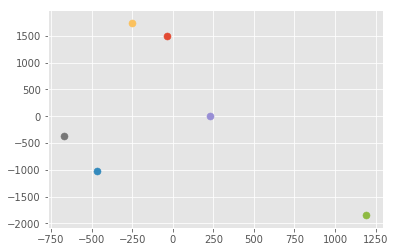

In [158]:
#2. for 2D plotting.
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5',]
for i in Zcent_2d.index:
    plt.scatter(Zcent_2d.iloc[i][0],Zcent_2d.iloc[i][1],color = colors[i],s = 50)
    
plt.show()
#difference happens because there's different fitting of centroids and the data points for maximizing class separability
#in preprocessing after fitting, the centroids are treated as a separately new dataset itself and fitted differently than dataset.

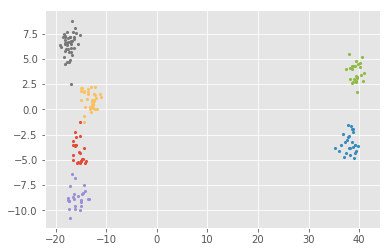

In [159]:
#Plotting the data point
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5',]
for label in set(z):
    color = colors[label]
    for i in range(0,len(Z_2d.index)):
        if (Z_2d.iloc[i][2] == label):
            plt.scatter(Z_2d.iloc[i][0], Z_2d.iloc[i][1], marker=".", color=color, s=5, linewidths=2)
plt.show()